# Analysis 5
# Analysis on life expectancy
- Analysing effects of factors like health expenditure, literacy and GDP on life expectancy in developing countries


In [1]:
# import pandas and read csv 

import pandas as pd
import numpy as np

worldBankData = pd.read_csv("/Users/vega/Downloads/WDI_csv/WDI_Data.csv")


In [2]:
#Create function to get the specific indicator names

def get_indicators():
	ind = worldBankData[['Indicator Name']]
	ind = ind.sort_values(by='Indicator Name')
	indicators = ind['Indicator Name'].tolist()
	return indicators

def get_life_expectancy_indicators():
	all_ind = get_indicators()
	life_expct = []
	for ind in all_ind:
		if ('Life expectancy' in ind):
			life_expct.append(ind)
	return set(life_expct)
def get_expenditure_indicators():
	all_ind = get_indicators()
	expend_ind = []
	for ind in all_ind:
		if ('Health expenditure' in ind):
			expend_ind.append(ind)
	return set(expend_ind)
def get_literacy_indicators():
	all_ind = get_indicators()
	expend_ind = []
	for ind in all_ind:
		if ('Literacy rate' in ind):
			expend_ind.append(ind)
	return set(expend_ind)
def get_gdp_indicators():
	all_ind = get_indicators()
	expend_ind = []
	for ind in all_ind:
		if ('GDP' in ind):
			expend_ind.append(ind)
	return set(expend_ind)

#Get the indicators for life expentancy from the data
#print(get_life_expectancy_indicators())
#Since the analysis is not gender specific, we shall retain Life expectancy at birth, total (years) as the indicator

#Get the indicators for GDP from the data
#print(get_gdp_indicators())
#we shall use 'GDP per capita (current US$)'as a valid indicator for GDP

#Get the indicators for life expentancy from the data
#print(get_expenditure_indicators())
#we shall use 'Health expenditure per capita (current US$)'as a valid indicator for health expenditure

#Get the indicators for life expentancy from the data
#print(get_literacy_indicators())
#we shall use 'Health expenditure per capita (current US$)'as a valid indicator for health expenditure

indc_list = ['Life expectancy at birth, total (years)','Health expenditure per capita (current US$)','GDP per capita (current US$)','Literacy rate, adult male (% of males ages 15 and above)','Literacy rate, adult male (% of males ages 15 and above)']
worldBankDataAnalysis = worldBankData[worldBankData['Indicator Name'].isin(indc_list)]
worldBankDataAnalysis = worldBankDataAnalysis[worldBankDataAnalysis['Country Name'].isin(['Mexico','Colombia','Brazil','Turkey'])]


In [7]:
#Keep only data for countries which has value in atleast one year
yearColumns = [col for col in worldBankDataAnalysis.columns if col.isdigit()]
worldBankDataAnalysis = worldBankDataAnalysis.dropna(subset=[yearColumns], how='all')
worldBankDataAnalysis = worldBankDataAnalysis.drop(['Country Code', 'Indicator Code'], axis=1)
worldBankDataAnalysis = worldBankDataAnalysis.set_index(['Country Name','Indicator Name']).stack().unstack(1)


In [9]:
#reset index and set the column names as required

worldBankDataAnalysis = worldBankDataAnalysis.reset_index()
new_columns = worldBankDataAnalysis.columns.values;
worldBankDataAnalysis.columns = ['Country Name', 'Year','GDP per capita (current US$)','Health expenditure per capita (current US$)','Life expectancy at birth, total (years)','Literacy rate, adult female (% of females ages 15 and above)']
worldBankDataAnalysis = worldBankDataAnalysis.dropna()


In [10]:
#Write to CSV file
worldBankDataAnalysis.to_csv('Analysis_5.csv')

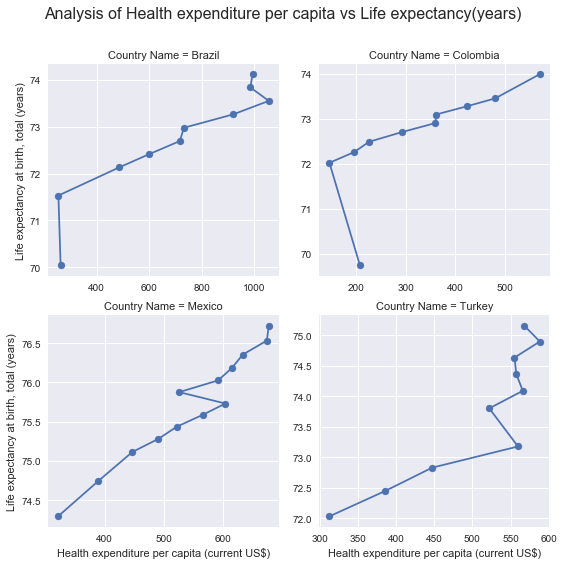

In [11]:
# Import seaborn to plot Health expenditure per capita vs Life expectancy
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#g = sns.lmplot(x="Health expenditure per capita (current US$)", y="Life expectancy at birth, total (years)", hue="Country Name", data=worldBankData)
g = sns.FacetGrid(worldBankDataAnalysis, col='Country Name', sharey=False, sharex=False, margin_titles=True,size=4, aspect=1,col_wrap=2)
g.map(plt.scatter, "Health expenditure per capita (current US$)", "Life expectancy at birth, total (years)")
g.map(plt.plot, "Health expenditure per capita (current US$)", "Life expectancy at birth, total (years)")

g.fig.suptitle("Analysis of Health expenditure per capita vs Life expectancy(years)", size=16)
g.fig.subplots_adjust(top=.88)
g.savefig("ana_5.1.png")


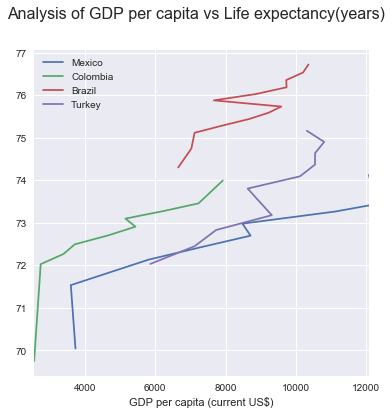

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6)); 

for name, group in worldBankDataAnalysis.groupby("Country Name"):
    group.plot(x="GDP per capita (current US$)", y="Life expectancy at birth, total (years)",ax=ax)

ax.legend(labels=['Mexico','Colombia','Brazil','Turkey'])

plt.suptitle("Analysis of GDP per capita vs Life expectancy(years)", size=16)
plt.subplots_adjust(top=.88)
plt.savefig("ana_5.2.png")


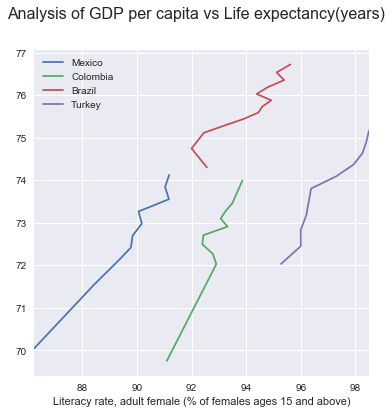

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6)); 

for name, group in worldBankDataAnalysis.groupby("Country Name"):
    group.plot(x="Literacy rate, adult female (% of females ages 15 and above)", y="Life expectancy at birth, total (years)",ax=ax)
ax.legend(labels=['Mexico','Colombia','Brazil','Turkey'])

plt.suptitle("Analysis of GDP per capita vs Life expectancy(years)", size=16)
plt.subplots_adjust(top=.88)
plt.savefig("ana_5.3.png")


# Conclusion
- Based on the analysis we can conclude that life expectancy shows a steady increase with increase in health expenditure, GDP and literacy rate.